# Classification of Diabetic People.

- The aim of this project is to look at the metadata related to the health stats of people and classify whether the person suffers from **diabetes** or not.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [5]:
train_raw = pd.read_csv(r'D:\ML\Random Forest Classifier\Diabetes_Xtrain.csv',low_memory= 0)
y_raw = pd.read_csv(r'D:\ML\Random Forest Classifier\Diabetes_Ytrain.csv',low_memory=0)
test_raw = pd.read_csv(r'D:\ML\Random Forest Classifier\Diabetes_Xtest.csv',low_memory=0)

In [6]:
train_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [116]:
train_raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
test_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [8]:
y_raw.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


## Handling Missing Values


In [9]:
tr = dict()
te = dict()
for k in train_raw.columns:
    tr[k]=0
    for i in train_raw[k].isnull():
        if(i==True):
            tr[k]+=1
for k in test_raw.columns:
    te[k]=0
    for i in test_raw[k].isnull():
        if(i==True):
            te[k]+=1
print(color.BOLD+"The number of missing values are:"+color.END)
print(color.UNDERLINE+"Training Set"+color.END)
for i in tr.items():print(i)
print(color.UNDERLINE+"Test set"+color.END)
for i in te.items():print(i)

The number of missing values are:
Training Set
('Pregnancies', 0)
('Glucose', 0)
('BloodPressure', 0)
('SkinThickness', 0)
('Insulin', 0)
('BMI', 0)
('DiabetesPedigreeFunction', 0)
('Age', 0)
Test set
('Pregnancies', 0)
('Glucose', 0)
('BloodPressure', 0)
('SkinThickness', 0)
('Insulin', 0)
('BMI', 0)
('DiabetesPedigreeFunction', 0)
('Age', 0)


- The above analysis states that **there are no missing values in the test or the training set**

# Describing Variables

- The **training dataset and test dataset** comprises of 8 columns each which are **'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'**
- These 8 form the **independent variables** for our dataset.
- The y_train dataset consists of the **dependent variable OUTCOME**. It has boolean values based on the fact whether a particular person is **DIABETIC** or **NON - DIABETIC**.
- **Diabetic** - 1
- **NonDiabetic** - 0
- All of the columns of the **training dataset** have been described below.


In [10]:
train_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [11]:
combine = pd.concat([train_raw,y_raw],axis=1)
combine.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


- According to the correlation analysis, it was noted that **BloodPressure and SkinThickness** were the most weakly correlated variables.

In [12]:
combine.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.175781,0.159623,-0.089059,-0.059903,0.043933,-0.036454,0.555994,0.213015
Glucose,0.175781,1.000000,0.151899,0.035213,0.332527,0.213883,0.151490,0.261131,0.473483
BloodPressure,0.159623,0.151899,1.000000,0.235094,0.102192,0.272952,0.031765,0.254055,0.072045
SkinThickness,-0.089059,0.035213,0.235094,1.000000,0.456451,0.403305,0.179001,-0.115892,0.067829
Insulin,-0.059903,0.332527,0.102192,0.456451,1.000000,0.183658,0.222323,-0.049814,0.141941
BMI,0.043933,0.213883,0.272952,0.403305,0.183658,1.000000,0.143271,0.051957,0.311717
DiabetesPedigreeFunction,-0.036454,0.151490,0.031765,0.179001,0.222323,0.143271,1.000000,0.034847,0.179672
Age,0.555994,0.261131,0.254055,-0.115892,-0.049814,0.051957,0.034847,1.000000,0.204733
Outcome,0.213015,0.473483,0.072045,0.067829,0.141941,0.311717,0.179672,0.204733,1.000000


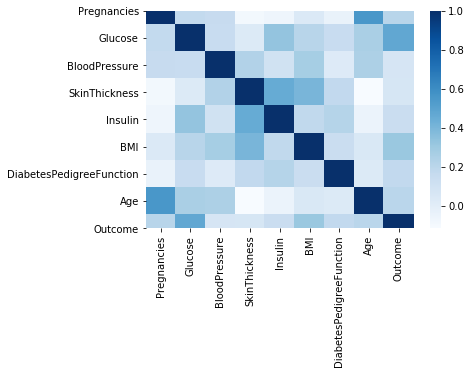

In [567]:
sns.heatmap(combine.corr(),cmap = 'Blues')
plt.savefig("D:\ML\Random Forest Classifier\corr_heatmap.png",dpi=200)

### The Distribution of classes
- The below bar plot shows us that the **training data sample does not have uniform distribution of the classes**
- The following graph gives an **important insight** that is that there exists **class imbalance**.
- This means our model will learn the features of **class 0 or Non-Diabetics** far better than it would learn how to classify Diabetics.

Percentage of ones: 34.89583333333333 %
Percentage of zeroes: 65.10416666666666 %


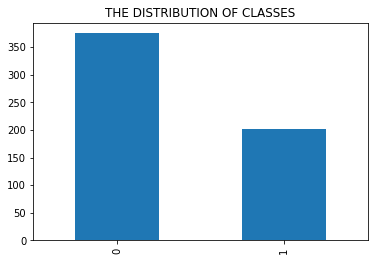

In [566]:
y_raw.Outcome.value_counts().plot.bar(title = 'THE DISTRIBUTION OF CLASSES')
print("Percentage of ones:",100*(y_raw.Outcome.value_counts()[1]/len(y_raw)),"%")
print("Percentage of zeroes:",100*(y_raw.Outcome.value_counts()[0]/len(y_raw)),"%")
plt.savefig("D:\ML\Random Forest Classifier\dist_raw.png",dpi=200)

# Evaluation metric
### F1 score
- We can see that since the data is not distributed uniformly and hence the better evaluation metric to **accuracy of the model** will be **the F1 score of the model**.
- To define F1 score, certain other metrics have to be calculated which are-



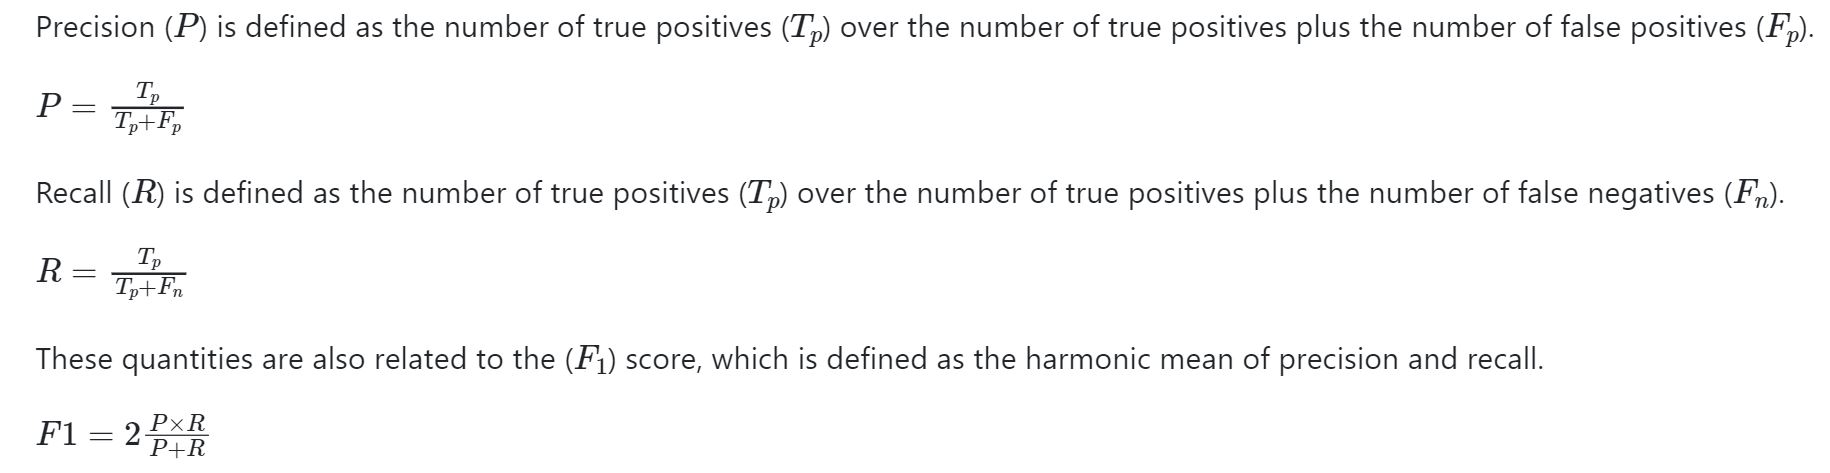

In [17]:
Image("D:\ML\Random Forest Classifier\metrics.png")

- According to the above definitions we can observe the **higher the precision, the lesser the false positive predictions** and **the higher the recall, the lesser the false negative predictions**.
- Since the regular mean treats all values equally and the **harmonic mean gives much more weight to low values** thereby punishing the extreme values more, the classifier will only get a **high F-1 score if both recall and precision are high.**

In [27]:
def prec(actual,pred):
    tp=0
    fp=0
    for i,k in zip(actual,pred):
        if(i==k and i==1):
            tp+=1
        if(i==0 and k==1):
            fp+=1
    return (tp/(tp+fp))
        

In [28]:
def recall(actual,pred):
    tp=0
    fn=0
    for i,k in zip(actual,pred):
        if(i==k and i==1):
            tp+=1
        if(i==1 and k==0):
            fn+=1
    return (tp/(tp+fn))

In [151]:
from sklearn.metrics import f1_score,accuracy_score

## Splitting data into validation  and training sets.

In [20]:
x_train, x_valid ,y_train, y_valid = train_test_split(train_raw, y_raw, test_size = 120,random_state = 2) 

TRAINING SET
Percentage of ones: 34.64912280701755 %
Percentage of zeroes: 65.35087719298247 %
PROBABILITIES OF CLASSIFICATION
Diabetic :  0.34649122807017546
Non-Diabetic :  0.6535087719298246


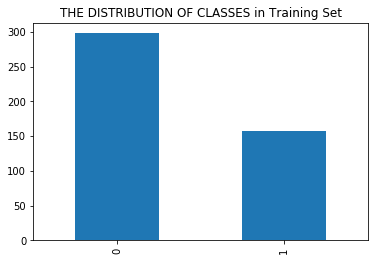

In [565]:
print("TRAINING SET")
y_train.Outcome.value_counts().plot.bar(title = 'THE DISTRIBUTION OF CLASSES in Training Set')
print("Percentage of ones:",100*(y_train.Outcome.value_counts()[1]/len(y_train)),"%")
print("Percentage of zeroes:",100*(y_train.Outcome.value_counts()[0]/len(y_train)),"%")
print(color.DARKCYAN +"PROBABILITIES OF CLASSIFICATION"+color.END)
print("Diabetic : ",y_train.Outcome.value_counts()[1]/len(y_train))
print("Non-Diabetic : ",y_train.Outcome.value_counts()[0]/len(y_train))
plt.savefig(r"D:\ML\Random Forest Classifier\dist_training.png",dpi=200)

VALIDATION SET
Percentage of ones: 35.833333333333336 %
Percentage of zeroes: 64.16666666666667 %
PROBABILITIES OF CLASSIFICATION
Diabetic :  0.35833333333333334
Non-Diabetic :  0.6416666666666667


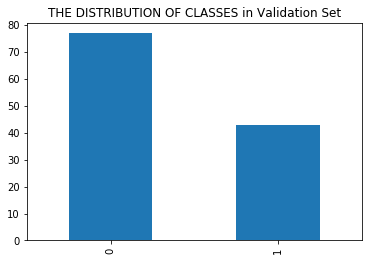

In [564]:
print(color.BOLD+"VALIDATION SET"+color.END)
y_valid.Outcome.value_counts().plot.bar(title = 'THE DISTRIBUTION OF CLASSES in Validation Set')
print("Percentage of ones:",100*(y_valid.Outcome.value_counts()[1]/len(y_valid)),"%")
print("Percentage of zeroes:",100*(y_valid.Outcome.value_counts()[0]/len(y_valid)),"%")
print(color.DARKCYAN +"PROBABILITIES OF CLASSIFICATION"+color.END)
print("Diabetic : ",y_valid.Outcome.value_counts()[1]/len(y_valid))
print("Non-Diabetic : ",y_valid.Outcome.value_counts()[0]/len(y_valid))
plt.savefig(r"D:\ML\Random Forest Classifier\dist_validation.png",dpi=200)

# MODELS 
### - Random Forest Classifier

In [131]:
m = RandomForestClassifier(n_estimators=30,max_features= 0.5,n_jobs=-1,oob_score=True)
m.fit(x_train,list(y_train.Outcome))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

- Training Score

In [133]:
m.score(x_train,list(y_train.Outcome))

0.9956140350877193

- Validation Score

In [134]:
m.score(x_valid,y_valid)

0.7583333333333333

Trees: 28 Score: 0.7666666666666667 Max features: 0.5


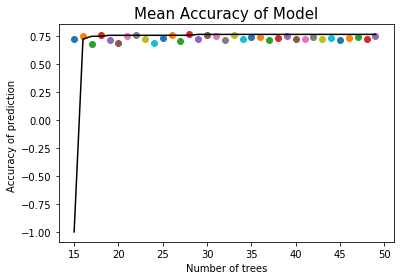

In [563]:
plt.title("Mean Accuracy of Model",fontsize = 15)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of prediction ")
now_score = -1
est = 0
max_f = 0
a = []
for i in range(15,50):
    m = RandomForestClassifier(n_estimators=i,max_features=0.5,n_jobs=-1)
    m.fit(x_train.drop("SkinThickness",axis=1),list(y_train.Outcome))
    curr = m.score(x_valid.drop("SkinThickness",axis=1),y_valid.Outcome)
    a.append(now_score)
    plt.scatter(i,curr)
    if(curr > now_score):
        now_score = curr
        est = i
print("Trees:",est,"Score:",now_score,"Max features:",0.5)
plt.plot([i for i in range(15,50)],a,color = 'black')
plt.savefig(r"D:\ML\Random Forest Classifier\accuarcy_rforest.png",dpi=200)

Trees: 27 Score: 0.6052631578947368 Max features: 0.5


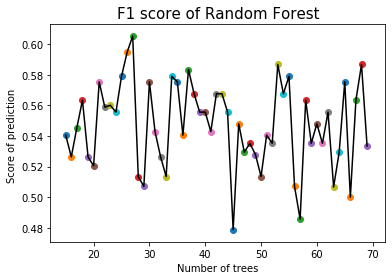

In [515]:
plt.title("F1 score of Random Forest",fontsize = 15)
plt.xlabel("Number of trees")
plt.ylabel("Score of prediction ")
now = -1
f_value = 0
f_vals =[]
estimators = 0
for i in range(15,70):
    
    m = RandomForestClassifier(n_estimators=i,max_features=0.5,n_jobs=-1,bootstrap=0)        
    m.fit(x_train,list(y_train.Outcome))
    curr = f1_score(y_valid.Outcome,m.predict(x_valid))
    plt.scatter(i,curr)
    f_vals.append(curr)
    if(curr > now):
        now = curr
        estimators=i
print("Trees:",estimators,"Score:",now,"Max features:",0.5)
plt.plot([i for i in range(15,70)],f_vals,color= 'black')
plt.savefig(r"D:\ML\Random Forest Classifier\f1_score_rforest.png",dpi=200)

- From the above garphs, we can see that the model with **20-30** trees had the best accuracy and the f1 score.
- Now, builiding final model on 27 trees we get the below model.

In [556]:
m = RandomForestClassifier(n_estimators=27,max_features=0.8,bootstrap=0)
m.fit(x_train,list(y_train.Outcome))

RandomForestClassifier(bootstrap=0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [557]:
y_valid["Index"] = [i for i in range(len(y_valid))]

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [558]:
y_valid.head(n=3)

,Outcome,Index
309,1,0
192,1,1
524,0,2


In [559]:
preds = m.predict(x_valid)

In [560]:
c1 = confusion_matrix(y_valid['Outcome'],preds)

# rows are the actual class
# collumns are the predicted class
print(c1)

[[68  9]
 [20 23]]


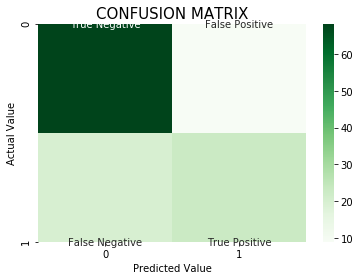

In [561]:
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c1,annot =labels,fmt='',cmap = 'Greens')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
plt.savefig("D:\ML\Random Forest Classifier\cmatrix_rforest.png",dpi=200)


In [562]:
print("Recall of prdeicted values:",recall(y_valid.Outcome,preds))
print("Precision of predicted values:",prec(y_valid.Outcome,preds))
print("The F1 score is :",f1_score(y_valid.Outcome,preds)*100,"%")
print("The mean accuracy of model is:",accuracy_score(y_valid.Outcome,preds)*100,"%")

Recall of prdeicted values: 0.5348837209302325
Precision of predicted values: 0.71875
The F1 score is : 61.33333333333333 %
The mean accuracy of model is: 75.83333333333333 %


## -KNN Classifier

In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
train_raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## F1 score and Accuracy
- In the correlation matrix it was noted that **BloodPressure** and **SkinThickness** were very weakly correlated variables.
- Hence, the model was formed by dropping each of them one by one and the f1 score of the model was plotted.
- The score did not improve but it was found that **7 neighbours** were the optimum number of the neighbours for the dataset.

Dropping BP
Dropping Skin Thickness


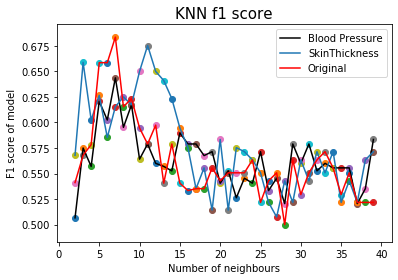

In [451]:
fs1=[]
fs2=[]
fs=[]
labels = ['BloodPressure', 'SkinThickness']
plt.xlabel("Number of neighbours")
plt.ylabel("F1 score of model")
for k in labels:
    for i in range(2,40):
        knn = KNeighborsClassifier(n_neighbors= i, weights='distance')
        knn.fit(x_train.drop(k,axis=1),list(y_train.Outcome))
        if(k=='BloodPressure'):
            fs1.append(f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1))))
            plt.scatter(i,f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1))))
        else:
            fs2.append(f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1)))) 
            plt.scatter(i,f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1))))
for i in range(2,40):
        knn = KNeighborsClassifier(n_neighbors= i, weights='distance')
        knn.fit(x_train,list(y_train.Outcome))
        fs.append(f1_score(y_valid.Outcome, knn.predict(x_valid)))
        plt.scatter(i,f1_score(y_valid.Outcome, knn.predict(x_valid)))
print("Dropping BP")

plt.plot([i for i in range(2,40)],fs1,color = 'black',label = 'Blood Pressure')
print("Dropping Skin Thickness")
plt.title("KNN f1 score",fontsize=15)
plt.plot([i for i in range(2,40)],fs2,label = 'SkinThickness')
plt.plot([i for i in range(2,40)],fs,label='Original',color='red')
plt.legend()
plt.savefig("D:\ML\Random Forest Classifier\knn_f1_score.png",dpi=200)

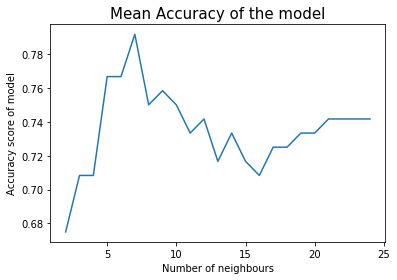

In [449]:
acc=[]
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy score of model")
for i in range(2,25):
    knn = KNeighborsClassifier(n_neighbors= i, weights='distance')
    knn.fit(x_train,list(y_train.Outcome))
    acc.append(accuracy_score(y_valid.Outcome, knn.predict(x_valid)))
plt.title("Mean Accuracy of the model",fontsize=15)
plt.plot([i for i in range(2,25)],acc)
plt.savefig("D:\ML\Random Forest Classifier\knn_accuracy.png",dpi=200)

In [579]:
?DistanceMetric

Object `DistanceMetric` not found.


In [572]:
knn = KNeighborsClassifier(n_neighbors= 7, weights='distance',metric = 'euclidean')
knn.fit(x_train,list(y_train.Outcome))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [573]:
pred_knn = knn.predict(x_valid)


In [574]:
c1= confusion_matrix(y_valid['Outcome'],pred_knn)
print(c1)

[[68  9]
 [16 27]]


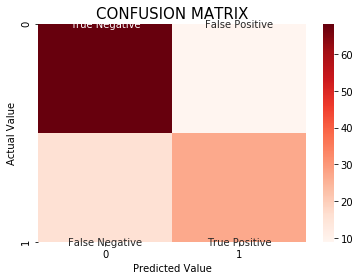

In [576]:
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c1,annot =labels,fmt='',cmap = 'Reds')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
plt.savefig("D:\ML\Random Forest Classifier\c_matrix_knn.png",dpi=200)

In [577]:
print("Precision of the model on validation:",prec(y_valid.Outcome,pred_knn))
print("Recall of the model on validation:",recall(y_valid.Outcome,pred_knn))
print("Accuracy of model:",accuracy_score(y_valid.Outcome,pred_knn))
print("F1 score of model:",f1_score(y_valid.Outcome,pred_knn))

Precision of the model on validation: 0.75
Recall of the model on validation: 0.627906976744186
Accuracy of model: 0.7916666666666666
F1 score of model: 0.6835443037974683


- It is noted that the KNN classifier performs **better** than the Random Forest Classifier and thus it is chosen for the final prediction set.
## FINAL MODEL -
###   KNN classifier with 7 nearest neighbours as the k value and the distance type is euclidean.

In [408]:
test_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [409]:
final_predictions = knn.predict(test_raw)

In [416]:
final = pd.DataFrame({'Outcome':final_predictions})

In [417]:
final.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [420]:
final.to_csv(r"D:\ML\Random Forest Classifier\final_predictions.csv")